In [1]:
import numpy as np
from numpy import zeros
from matplotlib import pyplot as plt


In [2]:

def polyModelWithNoise(x, theta, sigma):
    """
    FINISH DOCS
    Plots a sample of 100 points linearly arranged between 0 and 1. For no noise, sigma = 0.
    
    Args:
        x: A numpy array of x values
        theta: a list of [theta1, theta2], parameters of the polynomial
        sigma: the standard ditribution of the noise distribution

    Returns:
        A numpy array of f(x, theta)
    """

    # initialise an empty array of length x
    y = zeros(len(x))

    # loop over all values of theta for all values of x
    for j in range(len(x)):
        x_temp = x[j]
        y_temp = zeros(len(theta))
        for i in range(len(theta)):
            y_temp[i] = theta[i] * (x[j] ** i)
        y[j] = sum(y_temp) + (sigma * np.random.randn())   # add noise

    # plot
    fig, ax = plt.subplots()
    ax.plot(x, y)


None


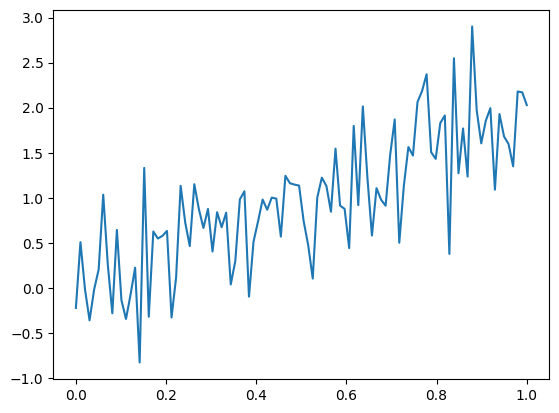

In [3]:
x = np.linspace(0, 1, 100)
theta = [0, 2]
sigma = 0.5
y = polyModelWithNoise(x, theta, sigma)
print(y)


In [ ]:
def polyGradient(x, theta):
    #TO DO: generalise for other polynomials
    """
    Returns the gradient of the polynomial function with respect to theta
    
    Args:
        x: a numpy array of x values
        theta: a list of [theta1, theta2], parameters of the polynomial

    Returns:
        A 2D array of the derivives of each term in the polynomial
    """

    y = zeros(len(x))
    for i in (range(len(x))):
        y[i] = (0, theta[1])

    return y

    

In [34]:
def samples(type, nsamples):
    if type == "uniform":
        return np.random.uniform(0, 1, nsamples)
    elif type == "normal":
        return np.random.randn(nsamples)
    else:
        print("Invalid type. Usage:")
        print("samples(type, nsamples)")
        print("params: ")
        print("     type: the type of ditribution to smple from. Either 'normal' or 'uniform'.")
        print("     nsamples: the number of samples to take.")



In [ ]:
def get_new_theta(theta, eta, sigma, model_y, true_y):
    #TO DO: function docs

    deviation = model_y - true_y
    grad_f = polyGradient(x, theta)
    new_theta = theta - eta * np.average(deviation[None,:] * grad_f, axis = 1)

    return new_theta

In [ ]:
# Implement stochastic gradient descent algorithm

NUM_STEPS = 100
START_THETA = [-1, 0.5]
TRUE_THETA = [0, 2]
TRUE_SIGMA = 0.5
ETA = 0.5

theta = START_THETA
theta_path = zeros(NUM_STEPS + 1, len(START_THETA))     # initialise empty path array
theta_path[0] = theta                            # path starts at theta

for i in range(NUM_STEPS):
    x = samples('uniform', 10)
    true_y = polyModelWithNoise(x, TRUE_THETA,  TRUE_SIGMA)
    model_y = polyModelWithNoise(x, theta, 0)
    theta = get_new_theta(theta, ETA, sigma, model_y, true_y)  # update theta
    theta_path[i+1] = theta  # update path with new theta